<a href="https://colab.research.google.com/github/dafegh/Concrete-Image-Processing-/blob/main/Concrete_Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
img = cv2.imread('/content/crack 3.jpg')

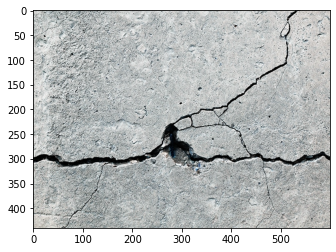

In [11]:
plt.imshow(img)

In [12]:
img.shape

(440, 600, 3)

In [13]:
# Convert into gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

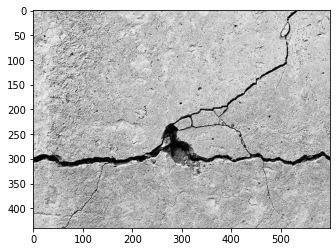

In [15]:
plt.imshow(gray,cmap='gray')

In [16]:
# Image processing ( smoothing )
blur = cv2.blur(gray,(3,3))

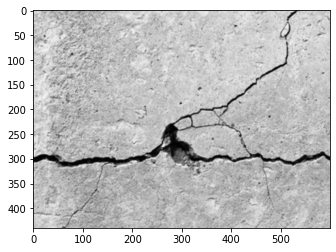

In [19]:
plt.imshow(blur,cmap='gray')

In [20]:
# Apply logarithmic transform
img_log = (np.log(blur+1)/(np.log(1+np.max(blur))))*255

# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)

In [21]:
# Image smoothing: bilateral filter
bilateral = cv2.bilateralFilter(img_log, 5, 75, 75)

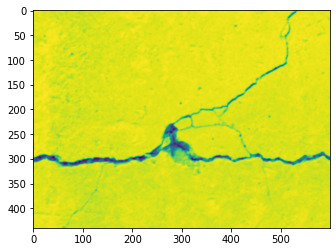

In [22]:
plt.imshow(bilateral)

In [23]:
# Canny Edge Detection
edges = cv2.Canny(bilateral,100,200)

In [24]:
# Morphological Closing Operator
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

In [25]:
# Create feature detecting method
orb = cv2.ORB_create(nfeatures=1500)

In [26]:
# Make featured Image
keypoints, descriptors = orb.detectAndCompute(closing, None)
featuredImg = cv2.drawKeypoints(closing, keypoints, None)

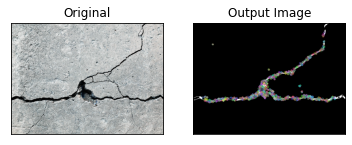

In [27]:
# Use plot to show original and output image
plt.subplot(121),plt.imshow(img)
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(featuredImg,cmap='gray')
plt.title('Output Image'),plt.xticks([]), plt.yticks([])
plt.show()